## Imports

In [17]:
import sys
!{sys.executable} -m pip install numpy matplotlib pandas scikit-learn tabulate

You should consider upgrading via the '/home/patrick/git/google-review-analysis-proj/venv/bin/python -m pip install --upgrade pip' command.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate 

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Data Processing

In [19]:
rdata = pd.read_csv("google_review_ratings.csv")
rdata = rdata.drop(["Unnamed: 25"], axis=1)
rdata.columns = ["ID", "churches", "resorts", "beaches", "parks", "theatres", "museums", "malls", "zoo", "restaurants", "pubs/bars", "local services", "burger/pizza shops", "hotels/other lodgings", "juice bars", "art galleries", "dance clubs", "swimming pools", "gyms", "bakeries", "beauty & spas", "cafes", "view points", "monuments", "gardens"]
pdata = rdata.drop(["ID"], axis=1)

In [20]:
rdata

ID  churches  resorts  beaches  parks  theatres  museums  malls  \
0        User 1      0.00     0.00     3.63   3.65      5.00     2.92   5.00   
1        User 2      0.00     0.00     3.63   3.65      5.00     2.92   5.00   
2        User 3      0.00     0.00     3.63   3.63      5.00     2.92   5.00   
3        User 4      0.00     0.50     3.63   3.63      5.00     2.92   5.00   
4        User 5      0.00     0.00     3.63   3.63      5.00     2.92   5.00   
...         ...       ...      ...      ...    ...       ...      ...    ...   
5451  User 5452      0.91     5.00     4.00   2.79      2.77     2.57   2.43   
5452  User 5453      0.93     5.00     4.02   2.79      2.78     2.57   1.77   
5453  User 5454      0.94     5.00     4.03   2.80      2.78     2.57   1.75   
5454  User 5455      0.95     4.05     4.05   2.81      2.79     2.44   1.76   
5455  User 5456      0.95     4.07     5.00   2.82      2.80     2.57   2.42   

       zoo  restaurants  ...  art galleries  dance clubs  swimming pools  \
0     2.35         2.33  ...           1.74         0.59            0.50   
1     2.64         2.33  ...           1.74         0.59            0.50   
2     2.64         2.33  ...           1.74         0.59            0.50   
3     2.35         2.33  ...           1.74         0.59            0.50   
4     2.64         2.33  ...           1.74         0.59            0.50   
...    ...          ...  ...            ...          ...             ...   
5451  1.09         1.77  ...           5.00         0.66            0.65   
5452  1.07         1.76  ...           0.89         0.65            0.64   
5453  1.05         1.75  ...           0.87         0.65            0.63   
5454  1.03         1.74  ...           5.00         0.64            0.63   
5455  1.02         1.74  ...           0.85         0.64            0.62   

      gyms  bakeries  beauty & spas  cafes  view points  monuments  gardens  
0     0.00      0.50           0.00   0.00          0.0        0.0     0.00  
1     0.00      0.50           0.00   0.00          0.0        0.0     0.00  
2     0.00      0.50           0.00   0.00          0.0        0.0     0.00  
3     0.00      0.50           0.00   0.00          0.0        0.0     0.00  
4     0.00      0.50           0.00   0.00          0.0        0.0     0.00  
...    ...       ...            ...    ...          ...        ...      ...  
5451  0.66      0.69           5.00   1.05          5.0        5.0     1.56  
5452  0.65      1.59           1.62   1.06          5.0        5.0     1.09  
5453  0.64      0.74           5.00   1.07          5.0        5.0     1.11  
5454  0.64      0.75           5.00   1.08          5.0        5.0     1.12  
5455  0.63      0.78           5.00   1.08          5.0        5.0     1.17  

[5456 rows x 25 columns]

## Algorithm Construction

In [21]:
# from http://godsnotwheregodsnot.blogspot.com/2013/11/kmeans-color-quantization-seeding.html
# color set specific designed for displaying K-means clustering on graph
LABEL_COLOR_MAP={0: "#000000", 1: "#FFFF00", 2: "#1CE6FF", 3: "#FF34FF", 4: "#FF4A46", 5: "#008941", 6: "#006FA6", 7: "#A30059", 8: "#FFDBE5", 9: "#7A4900", 10: "#0000A6", 11: "#63FFAC", 12: "#B79762", 13: "#004D43", 14: "#8FB0FF", 15: "#997D87", 16: "#5A0007", 17: "#809693", 18: "#FEFFE6", 19: "#1B4400", 20: "#4FC601", 21: "#3B5DFF", 22: "#4A3B53", 23: "#FF2F80", 24: "#61615A", 25: "#BA0900", 26: "#6B7900", 27: "#00C2A0", 28: "#FFAA92", 29: "#FF90C9", 30: "#B903AA", 31: "#D16100", 32: "#DDEFFF", 33: "#000035", 34: "#7B4F4B", 35: "#A1C299", 36: "#300018", 37: "#0AA6D8", 38: "#013349", 39: "#00846F", 40: "#372101", 41: "#FFB500", 42: "#C2FFED", 43: "#A079BF", 44: "#CC0744", 45: "#C0B9B2", 46: "#C2FF99", 47: "#001E09", 48: "#00489C", 49: "#6F0062", 50: "#0CBD66", 51: "#EEC3FF", 52: "#456D75", 53: "#B77B68", 54: "#7A87A1", 55: "#788D66", 56: "#885578", 57: "#FAD09F", 58: "#FF8A9A", 59: "#D157A0", 60: "#BEC459", 61: "#456648", 62: "#0086ED", 63: "#886F4C", 64: "#34362D", 65: "#B4A8BD", 66: "#00A6AA", 67: "#452C2C", 68: "#636375", 69: "#A3C8C9", 70: "#FF913F", 71: "#938A81", 72: "#575329", 73: "#00FECF", 74: "#B05B6F", 75: "#8CD0FF", 76: "#3B9700", 77: "#04F757", 78: "#C8A1A1", 79: "#1E6E00", 80: "#7900D7", 81: "#A77500", 82: "#6367A9", 83: "#A05837", 84: "#6B002C", 85: "#772600", 86: "#D790FF", 87: "#9B9700", 88: "#549E79", 89: "#FFF69F", 90: "#201625", 91: "#72418F", 92: "#BC23FF", 93: "#99ADC0", 94: "#3A2465", 95: "#922329", 96: "#5B4534", 97: "#FDE8DC", 98: "#404E55", 99: "#0089A3", 100: "#CB7E98", 101: "#A4E804", 102: "#324E72", 103: "#6A3A4C", 104: "#83AB58", 105: "#001C1E", 106: "#D1F7CE", 107: "#004B28", 108: "#C8D0F6", 109: "#A3A489", 110: "#806C66", 111: "#222800", 112: "#BF5650", 113: "#E83000", 114: "#66796D", 115: "#DA007C", 116: "#FF1A59", 117: "#8ADBB4", 118: "#1E0200", 119: "#5B4E51", 120: "#C895C5", 121: "#320033", 122: "#FF6832", 123: "#66E1D3", 124: "#CFCDAC", 125: "#D0AC94", 126: "#7ED379", 127: "#012C58", 128: "#7A7BFF", 129: "#D68E01", 130: "#353339", 131: "#78AFA1", 132: "#FEB2C6", 133: "#75797C", 134: "#837393", 135: "#943A4D", 136: "#B5F4FF", 137: "#D2DCD5", 138: "#9556BD", 139: "#6A714A", 140: "#001325", 141: "#02525F", 142: "#0AA3F7", 143: "#E98176", 144: "#DBD5DD", 145: "#5EBCD1", 146: "#3D4F44", 147: "#7E6405", 148: "#02684E", 149: "#962B75", 150: "#8D8546", 151: "#9695C5", 152: "#E773CE", 153: "#D86A78", 154: "#3E89BE", 155: "#CA834E", 156: "#518A87", 157: "#5B113C", 158: "#55813B", 159: "#E704C4", 160: "#00005F", 161: "#A97399", 162: "#4B8160", 163: "#59738A", 164: "#FF5DA7", 165: "#F7C9BF", 166: "#643127", 167: "#513A01", 168: "#6B94AA", 169: "#51A058", 170: "#A45B02", 171: "#1D1702", 172: "#E20027", 173: "#E7AB63", 174: "#4C6001", 175: "#9C6966", 176: "#64547B", 177: "#97979E", 178: "#006A66", 179: "#391406", 180: "#F4D749", 181: "#0045D2", 182: "#006C31", 183: "#DDB6D0", 184: "#7C6571", 185: "#9FB2A4", 186: "#00D891", 187: "#15A08A", 188: "#BC65E9", 189: "#FFFFFE", 190: "#C6DC99", 191: "#203B3C", 192: "#671190", 193: "#6B3A64", 194: "#F5E1FF", 195: "#FFA0F2", 196: "#CCAA35", 197: "#374527", 198: "#8BB400", 199: "#797868", 200: "#C6005A", 201: "#3B000A", 202: "#C86240", 203: "#29607C", 204: "#402334", 205: "#7D5A44", 206: "#CCB87C", 207: "#B88183", 208: "#AA5199", 209: "#B5D6C3", 210: "#A38469", 211: "#9F94F0", 212: "#A74571", 213: "#B894A6", 214: "#71BB8C", 215: "#00B433", 216: "#789EC9", 217: "#6D80BA", 218: "#953F00", 219: "#5EFF03", 220: "#E4FFFC", 221: "#1BE177", 222: "#BCB1E5", 223: "#76912F", 224: "#003109", 225: "#0060CD", 226: "#D20096", 227: "#895563", 228: "#29201D", 229: "#5B3213", 230: "#A76F42", 231: "#89412E", 232: "#1A3A2A", 233: "#494B5A", 234: "#A88C85", 235: "#F4ABAA", 236: "#A3F3AB", 237: "#00C6C8", 238: "#EA8B66", 239: "#958A9F", 240: "#BDC9D2", 241: "#9FA064", 242: "#BE4700", 243: "#658188", 244: "#83A485", 245: "#453C23", 246: "#47675D", 247: "#3A3F00", 248: "#061203", 249: "#DFFB71", 250: "#868E7E", 251: "#98D058", 252: "#6C8F7D", 253: "#D7BFC2", 254: "#3C3E6E", 255: "#D83D66", 256: "#2F5D9B", 257: "#6C5E46", 258: "#D25B88", 259: "#5B656C", 260: "#00B57F", 261: "#545C46", 262: "#866097", 263: "#365D25", 264: "#252F99", 265: "#00CCFF", 266: "#674E60", 267: "#FC009C", 268: "#92896B"}

In [28]:
# method from https://stackoverflow.com/questions/36195457/python-sklearn-kmeans-how-to-get-the-samples-points-in-each-clusters#43696871
def ClusterIndices(clustNum, labels_array):
    return np.where(labels_array == clustNum)[0]

def multi_fs_kmean():
    """
    This function not only used for training, but also for generating project essay content.
    """
    for i in range(3, 25):
        
        print("## Wild K-Means Analysis with c="+str(i))
        
        kmeans = KMeans(n_clusters=i).fit(pdata)
        centroids = kmeans.cluster_centers_

        labels = kmeans.predict(pdata)
        C = kmeans.cluster_centers_
            
            
        pca = PCA(n_components=2)
        pca_fit = pca.fit(pdata)
        principalComponents = pca_fit.transform(pdata)
        principalDf = pd.DataFrame(data = principalComponents, columns = ['x', 'y'])

        label_color = [LABEL_COLOR_MAP[l] for l in labels]
        
        fig = plt.figure(figsize = (10,10))
        ax = fig.add_subplot(1,1,1)
        ax.set_title('Wild K-Mean Clustering with c='+str(i+1), fontsize = 20)
        plt.scatter(principalDf['x'], principalDf['y'],c=label_color, s=50, alpha=0.5)

        C_transformed = pca_fit.transform(C)
        plt.scatter(C_transformed[:, 0], C_transformed[:, 1], s=200, marker=('x'))
        plt.savefig("./img/"+str(i-2)+".png")
        plt.close()
        print("![fig."+str(i-2)+" Wild K-Mean Clustering with c="+str(i)+"](./img/"+str(i-2)+".png)")
        print()
        
        for i in range(len(C)):
            print()
            print("### Cluster "+str(i+1))
            print()
            print("Centroid: "+ str(C[i]))
            print()
            dmeans = pdata.loc[ClusterIndices(i, kmeans.labels_)].mean().to_frame(name="mean").transpose()
            dvar = pdata.loc[ClusterIndices(i, kmeans.labels_)].var().to_frame(name="variance").transpose()
            d = pd.concat([dmeans, dvar]).transpose()
            print(tabulate(d, headers='keys', tablefmt='github'))


## Wild K-Means Analysis with c=3


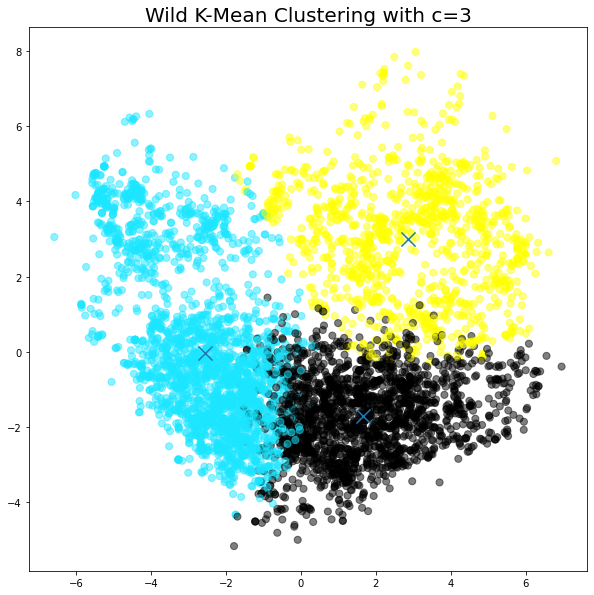


Cluster 1

Centroid: [1.47116316 2.57228947 3.17113158 3.93606842 4.36432632 3.69134737
 3.39543158 2.39701579 2.66983684 2.58333158 2.32073158 1.92733158
 1.90764211 1.45577368 1.27887895 1.09033158 0.71815789 0.53654211
 0.55935263 0.67543684 0.83020526 2.1762     1.87334737 1.70020526]

+-----------------------+--------------------+---------------------+
|                       |        mean        |      variance       |
+-----------------------+--------------------+---------------------+
|       churches        | 1.4713782219884293 | 0.43360388897809926 |
|        resorts        | 2.572167280378748  | 1.9816524583183206  |
|        beaches        | 3.1706575486586064 | 1.9005893042443176  |
|         parks         | 3.935197264597587  | 1.3587445531714626  |
|       theatres        | 4.364660704892166  | 0.8190168979761324  |
|        museums        |  3.69041031036296  | 1.3204289894515193  |
|         malls         | 3.3962756443976687 | 1.6919820166117725  |
|          zoo    

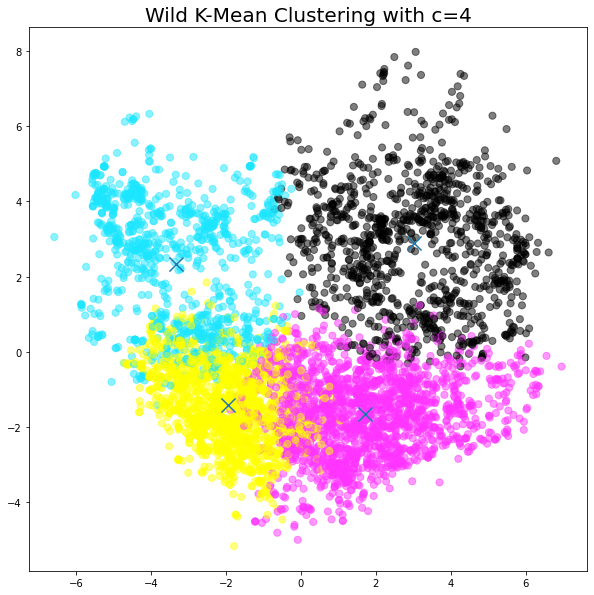


Cluster 1

Centroid: [2.27586402 2.77915958 2.63935788 2.42642115 2.12604344 1.92974504
 1.97395656 1.54787535 1.90114259 1.5890085  1.50756374 1.37123702
 1.45677998 1.73902738 2.18990557 1.51084986 1.5821813  1.67162417
 2.36909348 2.24348442 1.82898961 2.78194523 2.38322002 2.47534466]

+-----------------------+--------------------+---------------------+
|                       |        mean        |      variance       |
+-----------------------+--------------------+---------------------+
|       churches        |  2.27586402266289  | 0.8239928964265221  |
|        resorts        | 2.7791595845136947 |  1.028889179612683  |
|        beaches        | 2.6393578847969774 | 0.9783275646140498  |
|         parks         | 2.4264211520302146 | 0.8684383139567092  |
|       theatres        | 2.1260434372049084 | 0.35754869754431773 |
|        museums        | 1.9297450424929112 | 0.2641703508142469  |
|         malls         | 1.973956562795086  | 0.6327280926293857  |
|          zoo    

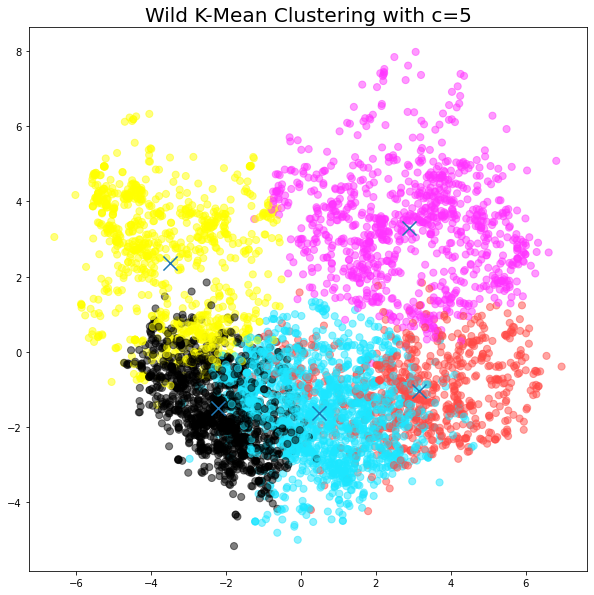


Cluster 1

Centroid: [1.17290535 1.96632922 1.77377778 2.06145679 2.1848642  2.72860082
 4.01550617 3.72235391 4.64106173 4.41469959 3.61176955 2.00002469
 1.74578601 1.5720823  2.07993416 1.01293827 0.64851852 0.45376955
 0.46567078 0.55967078 0.65846091 1.11288889 1.01206584 1.11190947]

+-----------------------+--------------------+---------------------+
|                       |        mean        |      variance       |
+-----------------------+--------------------+---------------------+
|       churches        | 1.1729053497942392 | 0.22042310058914802 |
|        resorts        | 1.9663292181069971 | 1.8588723462213808  |
|        beaches        | 1.773777777777782  | 0.7699095222405277  |
|         parks         | 2.061456790123455  | 1.0283442516321961  |
|       theatres        | 2.184864197530859  | 0.8462754139971934  |
|        museums        | 2.728600823045269  |  1.30835059423326   |
|         malls         | 4.015506172839491  |  1.071921798767479  |
|          zoo    

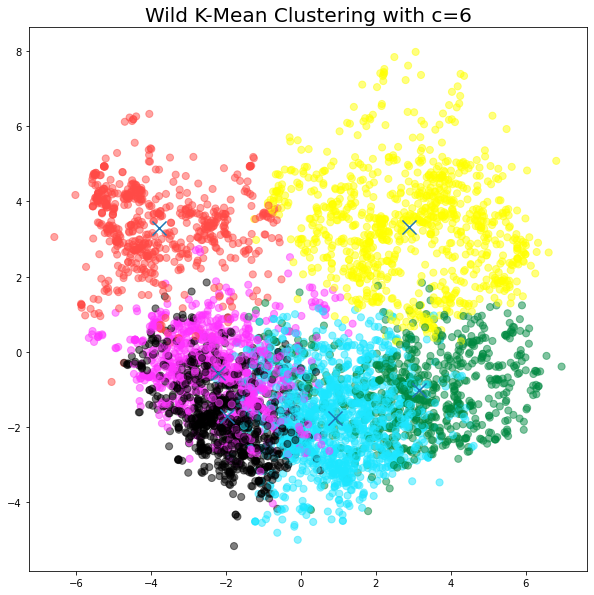


Cluster 1

Centroid: [1.23235294 1.57614253 1.70075792 2.20024887 2.30085973 2.56595023
 3.70004525 3.63363122 4.51929864 4.46661765 4.18727376 2.0985181
 1.86495475 1.35076923 1.39468326 1.11776018 0.67200226 0.39847285
 0.35665158 0.44542986 0.57705882 1.23752262 1.09892534 1.19277149]

+-----------------------+---------------------+---------------------+
|                       |        mean         |      variance       |
+-----------------------+---------------------+---------------------+
|       churches        | 1.2323529411764726  | 0.14192537472520175 |
|        resorts        | 1.5761425339366564  | 0.6143020906463464  |
|        beaches        |  1.700757918552043  | 0.5012708858375662  |
|         parks         |  2.200248868778288  |  1.289366642410946  |
|       theatres        |  2.300859728506792  | 0.9984624536878095  |
|        museums        | 2.5659502262443454  | 0.9034614969535146  |
|         malls         |  3.700045248868777  | 0.9994500545753692  |
|        

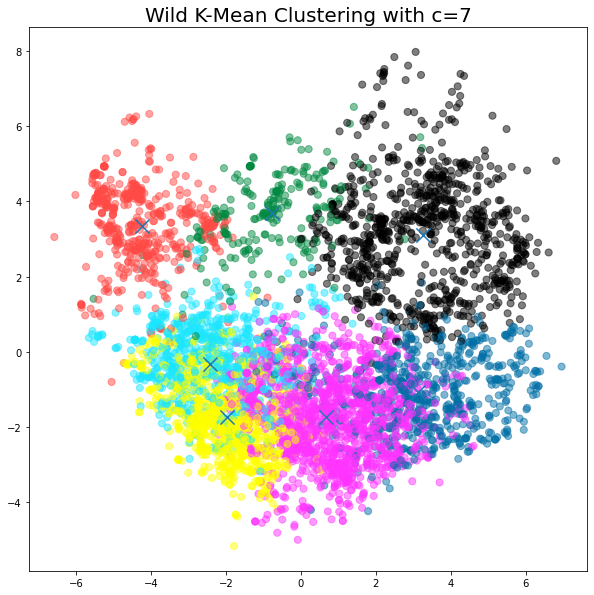


Cluster 1

Centroid: [2.40821886 2.81410943 2.56038417 2.27218859 2.06506403 1.87664726
 1.8416298  1.49322468 1.67920838 1.4940163  1.4921071  1.34772992
 1.45332945 1.73849825 2.10536671 1.4180326  1.44209546 1.58725262
 2.4155064  2.33842841 1.95683353 2.82509895 2.54769499 2.70859139]

+-----------------------+--------------------+---------------------+
|                       |        mean        |      variance       |
+-----------------------+--------------------+---------------------+
|       churches        | 2.4082188591385347 | 0.7365050988979989  |
|        resorts        | 2.8141094295692692 | 0.9532473120205393  |
|        beaches        | 2.5603841676367876 | 0.7596393627327284  |
|         parks         | 2.2721885913853277 | 0.5749534795433505  |
|       theatres        | 2.065064027939462  | 0.27995695976510926 |
|        museums        | 1.8766472642607601 | 0.26623256890567715 |
|         malls         | 1.8416298020954547 | 0.4202772940292143  |
|          zoo    

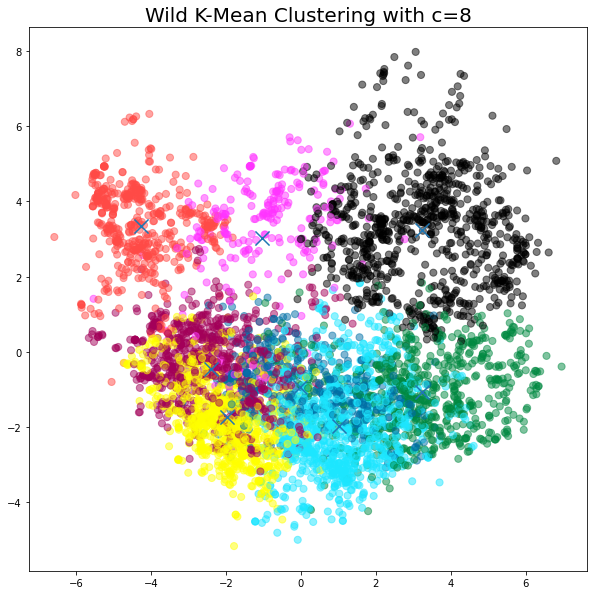


Cluster 1

Centroid: [2.44504762 2.76170238 2.51846429 2.21939286 2.03779762 1.85345238
 1.83127381 1.50025    1.6544881  1.50930952 1.50889286 1.36754762
 1.47025    1.78133333 2.15427381 1.43097619 1.51263095 1.65667857
 2.48469048 2.29146429 1.97863095 2.8265119  2.57302381 2.74792857]

+-----------------------+--------------------+---------------------+
|                       |        mean        |      variance       |
+-----------------------+--------------------+---------------------+
|       churches        | 2.445047619047619  | 0.6860014280038598  |
|        resorts        | 2.761702380952383  | 0.8844236777058889  |
|        beaches        | 2.5184642857142867 | 0.6996776149327437  |
|         parks         | 2.219392857142853  | 0.47456327813723803 |
|       theatres        | 2.037797619047616  | 0.2585864429025489  |
|        museums        | 1.8534523809523729 | 0.24641691072138036 |
|         malls         | 1.8312738095238046 | 0.4237112479425636  |
|          zoo    

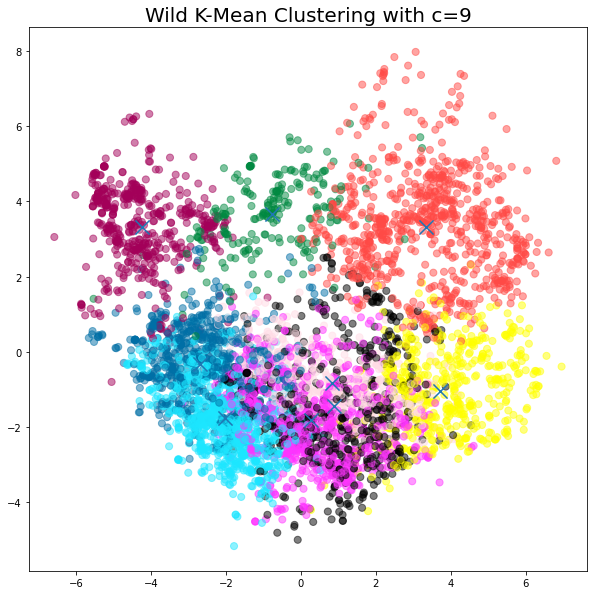


Cluster 1

Centroid: [1.43764136 4.67420032 3.70956381 3.51983845 3.84649435 3.29915994
 3.21991922 2.51943457 2.98646204 2.65042003 1.98059774 1.86625202
 1.63326333 1.99932149 1.66400646 1.19642973 0.5528433  0.48631664
 0.7396769  0.98051696 0.81951535 0.87565428 1.02772213 1.19938611]

+-----------------------+--------------------+---------------------+
|                       |        mean        |      variance       |
+-----------------------+--------------------+---------------------+
|       churches        | 1.4376413570274615 | 0.9590041365392505  |
|        resorts        | 4.674200323101778  | 0.4832648530096035  |
|        beaches        | 3.7095638126009756 | 1.5421786120216803  |
|         parks         | 3.5198384491114743 | 1.1897575790370676  |
|       theatres        | 3.8464943457189067 | 1.3627101824113337  |
|        museums        | 3.2991599353796475 | 1.3667627235702244  |
|         malls         | 3.2199192245557335 | 1.8831105112641229  |
|          zoo    

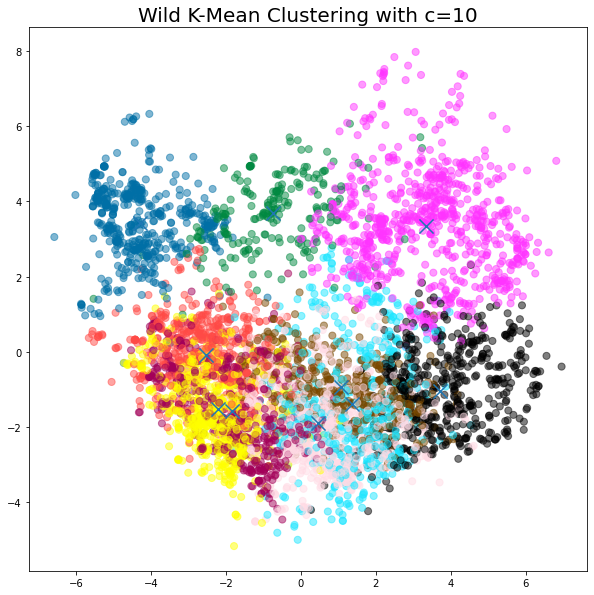


Cluster 1

Centroid: [1.5542246  2.22529412 3.27269162 4.40404635 4.0712656  3.23292335
 2.53402852 1.95682709 2.42655971 2.51515152 2.22996435 1.36461676
 1.09442068 1.05172906 1.194082   1.28520499 0.85996435 0.64096257
 0.60463458 1.07839572 1.14253119 4.78484848 2.23297683 1.70800357]

+-----------------------+--------------------+---------------------+
|                       |        mean        |      variance       |
+-----------------------+--------------------+---------------------+
|       churches        | 1.554224598930481  | 0.4216772994652416  |
|        resorts        | 2.2252941176470533 | 1.2183488865546235  |
|        beaches        | 3.2726916221033884 |  2.481022206518974  |
|         parks         | 4.404046345811054  | 1.0228702049910916  |
|       theatres        | 4.071265597147946  |  1.316680716832188  |
|        museums        | 3.232923351158641  | 1.4354703673287497  |
|         malls         | 2.534028520499102  | 1.0384780277565557  |
|          zoo    

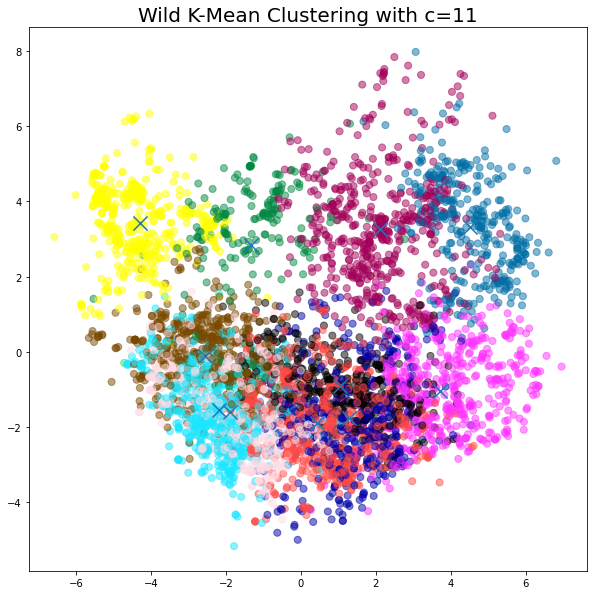


Cluster 1

Centroid: [1.85751269 2.4557868  2.55703046 3.92015228 4.3621066  3.05614213
 3.33129442 2.93845178 3.14256345 3.05096447 3.39170051 2.93068528
 3.86027919 1.92639594 1.23459391 0.88449239 0.92195431 0.75558376
 0.75870558 0.7398731  0.76667513 2.62467005 3.3092132  2.78548223]

+-----------------------+--------------------+----------------------+
|                       |        mean        |       variance       |
+-----------------------+--------------------+----------------------+
|       churches        | 1.857512690355331  | 0.30204367032200546  |
|        resorts        | 2.4557868020304565 |  0.6157903462884741  |
|        beaches        | 2.5570304568527913 |  0.6569313629377036  |
|         parks         | 3.920152284263963  |  1.7226579920176721  |
|       theatres        | 4.362106598984771  |  0.9861352456052059  |
|        museums        | 3.056142131979697  |  0.6260344428514255  |
|         malls         | 3.3312944162436584 |  0.4405441217499162  |
|       

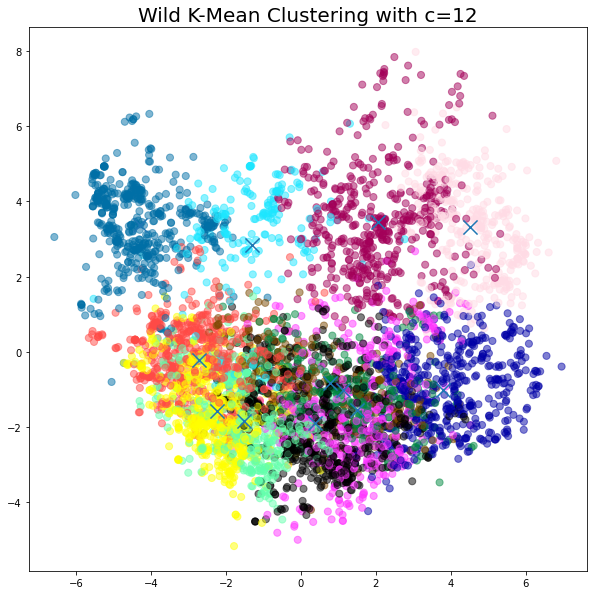


Cluster 1

Centroid: [1.16912913 1.6089039  2.79216216 3.40953453 4.23225225 4.3204955
 4.28126126 2.15951952 2.58114114 2.04758258 1.98522523 1.80534535
 1.815      1.65283784 1.33998498 0.93165165 0.69103604 0.49391892
 0.55653153 0.56993994 0.67429429 0.80887387 1.11007508 0.98217718]

+-----------------------+--------------------+---------------------+
|                       |        mean        |      variance       |
+-----------------------+--------------------+---------------------+
|       churches        | 1.1691291291291284 | 0.3348407442028497  |
|        resorts        | 1.6089039039039004 | 0.6695896238343594  |
|        beaches        | 2.792162162162158  |  1.890181483438327  |
|         parks         | 3.4095345345345374 | 1.4465491063243665  |
|       theatres        | 4.232252252252254  | 0.7544568746189793  |
|        museums        | 4.3204954954954955 | 0.9362639646413383  |
|         malls         |  4.28126126126126  |  1.414247128632397  |
|          zoo     

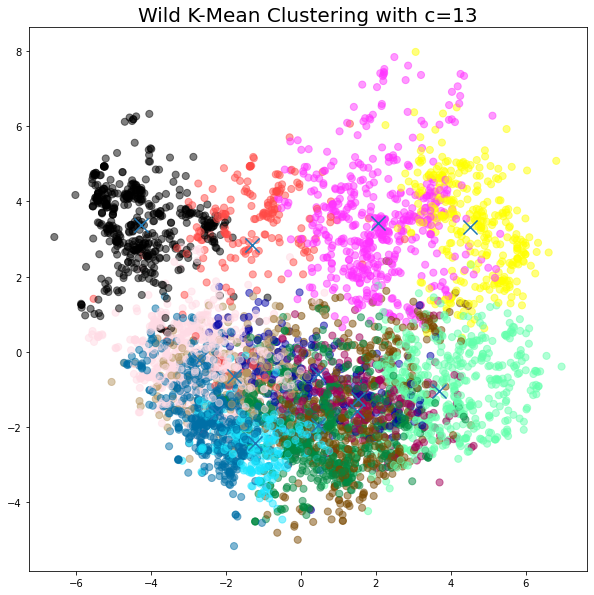


Cluster 1

Centroid: [0.64151767 0.89796258 1.58704782 1.57893971 1.5837422  1.60950104
 2.92453222 1.93307692 2.73629938 2.94428274 3.30885655 4.305842
 4.55471933 4.95881497 3.9133264  0.7366736  0.79885655 0.92496881
 1.38862786 1.09850312 0.57733888 0.55948025 0.54108108 0.64900208]

+-----------------------+--------------------+---------------------+
|                       |        mean        |      variance       |
+-----------------------+--------------------+---------------------+
|       churches        | 0.6415176715176713 | 0.2858649835412337  |
|        resorts        | 0.8979625779625768 | 0.3324354235966737  |
|        beaches        | 1.5870478170478197 | 0.1559991831254327  |
|         parks         | 1.5789397089397106 | 0.06514783177408179 |
|       theatres        | 1.5837422037422069 | 0.08837971673596638 |
|        museums        | 1.609501039501043  | 0.10282975051975071 |
|         malls         | 2.924532224532225  |  2.601828582813595  |
|          zoo      

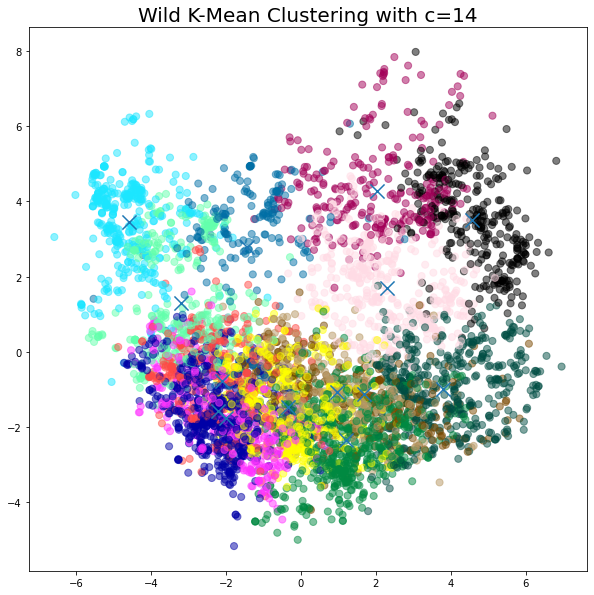


Cluster 1

Centroid: [2.57285266 2.55539185 2.40510972 1.98501567 1.84119122 1.5737931
 1.49874608 1.30163009 1.44661442 1.5137931  1.51805643 1.08746082
 0.98166144 1.19043887 2.50203762 1.66877743 1.29213166 1.3161442
 1.62018809 2.19996865 3.09203762 4.34884013 3.49426332 3.29924765]

+-----------------------+--------------------+---------------------+
|                       |        mean        |      variance       |
+-----------------------+--------------------+---------------------+
|       churches        | 2.5728526645768013 | 0.4200198241359593  |
|        resorts        | 2.555391849529781  | 0.25059096232329797 |
|        beaches        | 2.4051097178683403 | 0.3034269533329391  |
|         parks         | 1.9850156739811917 | 0.18789363182902555 |
|       theatres        | 1.8411912225705322 | 0.25134134382208534 |
|        museums        | 1.573793103448276  | 0.31768022121014977 |
|         malls         | 1.4987460815047011 | 0.4745682340647855  |
|          zoo      

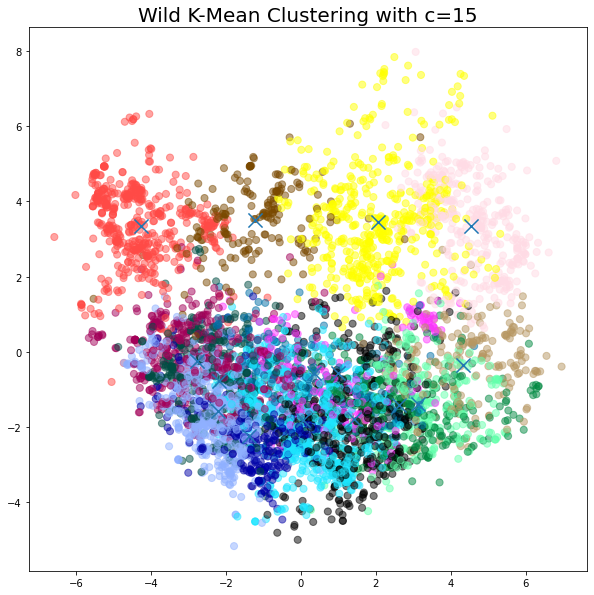


Cluster 1

Centroid: [1.45046256 4.49134361 4.1265859  3.99301762 4.24870044 3.42088106
 2.79623348 2.3180837  2.82751101 2.7107489  1.8961674  1.70737885
 1.61698238 1.61502203 1.7519163  1.35704846 0.49621145 0.37132159
 0.42557269 0.96742291 0.84081498 0.90700441 1.00788546 1.15257709]

+-----------------------+---------------------+----------------------+
|                       |        mean         |       variance       |
+-----------------------+---------------------+----------------------+
|       churches        | 1.4504625550660786  |  0.8347761652614472  |
|        resorts        | 4.4913436123348065  |  0.8331471973432186  |
|        beaches        |  4.126585903083707  |  0.9722644771518341  |
|         parks         | 3.9930176211453805  |  0.735776083574017   |
|       theatres        |  4.248700440528638  |  1.0268047091830244  |
|        museums        | 3.4208810572687227  |  1.5007038577860752  |
|         malls         | 2.7962334801762108  |  1.632465472960491   

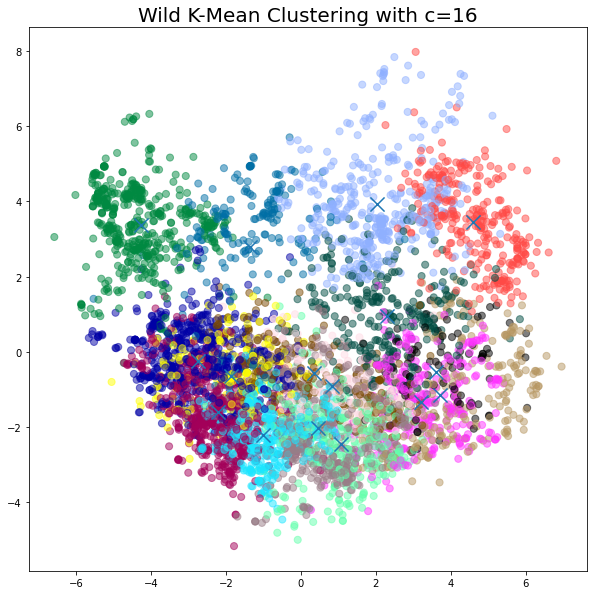


Cluster 1

Centroid: [1.2952381  2.52961905 2.27780952 4.64780952 3.62904762 2.61714286
 2.39171429 1.64657143 4.2187619  3.6307619  0.88533333 0.86409524
 0.87847619 0.98847619 1.08580952 2.0967619  0.60285714 0.5912381
 0.61666667 3.20257143 3.11666667 4.63457143 1.90257143 1.24980952]

+-----------------------+--------------------+-----------------------+
|                       |        mean        |       variance        |
+-----------------------+--------------------+-----------------------+
|       churches        | 1.2952380952380957 |  0.11603864468864464  |
|        resorts        | 2.529619047619048  |   2.794796007326009   |
|        beaches        | 2.277809523809524  |  1.9440788095238102   |
|         parks         | 4.647809523809523  |  0.6490711172161181   |
|       theatres        | 3.6290476190476206 |  1.0776952380952374   |
|        museums        | 2.6171428571428583 |  0.05061868131868134  |
|         malls         | 2.391714285714287  | 0.047033571428571556  |

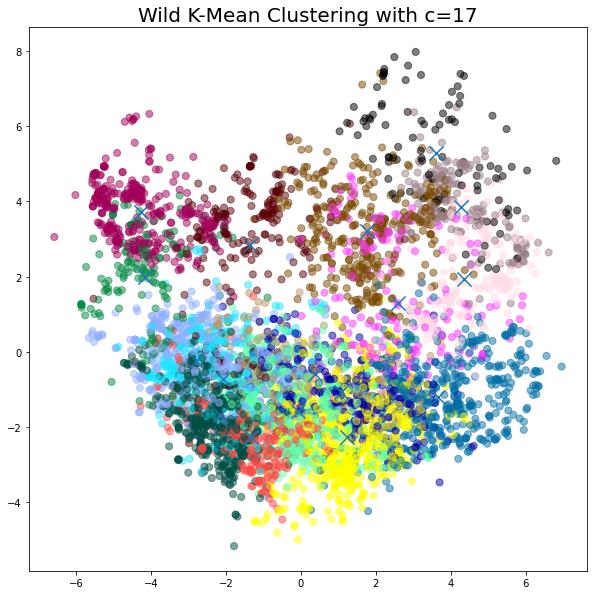


Cluster 1

Centroid: [2.3944898  2.29377551 2.01173469 1.70336735 1.53663265 1.51306122
 1.41040816 1.26897959 1.54357143 1.25530612 1.09704082 1.04836735
 1.9472449  3.39163265 1.35959184 1.63397959 1.82918367 1.57336735
 4.06081633 3.48387755 3.19091837 3.80489796 2.68367347 2.53510204]

+-----------------------+--------------------+---------------------+
|                       |        mean        |      variance       |
+-----------------------+--------------------+---------------------+
|       churches        | 2.3944897959183664 | 0.2306291184515043  |
|        resorts        | 2.2937755102040818 | 0.5278979697033453  |
|        beaches        | 2.0117346938775524 | 0.3765670629076372  |
|         parks         | 1.7033673469387758 | 0.33875452345886786 |
|       theatres        | 1.5366326530612249 | 0.3123029770671154  |
|        museums        | 1.5130612244897959 | 0.42612249105827926 |
|         malls         | 1.4104081632653065 | 0.14279158426257105 |
|          zoo    

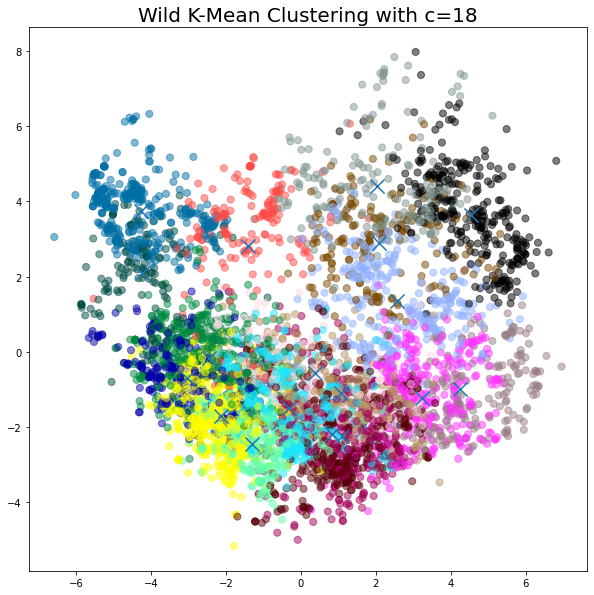


Cluster 1

Centroid: [2.57318033 2.50796721 2.35652459 1.95055738 1.79459016 1.52190164
 1.42731148 1.29242623 1.44363934 1.51301639 1.51547541 1.06881967
 0.98596721 1.24298361 2.55370492 1.70406557 1.30462295 1.33508197
 1.6207541  2.23727869 3.18062295 4.32206557 3.4715082  3.34954098]

+-----------------------+--------------------+----------------------+
|                       |        mean        |       variance       |
+-----------------------+--------------------+----------------------+
|       churches        | 2.573180327868851  | 0.33628294434857614  |
|        resorts        | 2.507967213114755  |  0.1788761173425366  |
|        beaches        | 2.3565245901639362 | 0.24651025021570314  |
|         parks         | 1.950557377049182  | 0.18317962251941336  |
|       theatres        | 1.7945901639344244 |  0.2091505716134601  |
|        museums        | 1.5219016393442626 |  0.2505154508196724  |
|         malls         | 1.4273114754098346 | 0.31625853753235594  |
|       

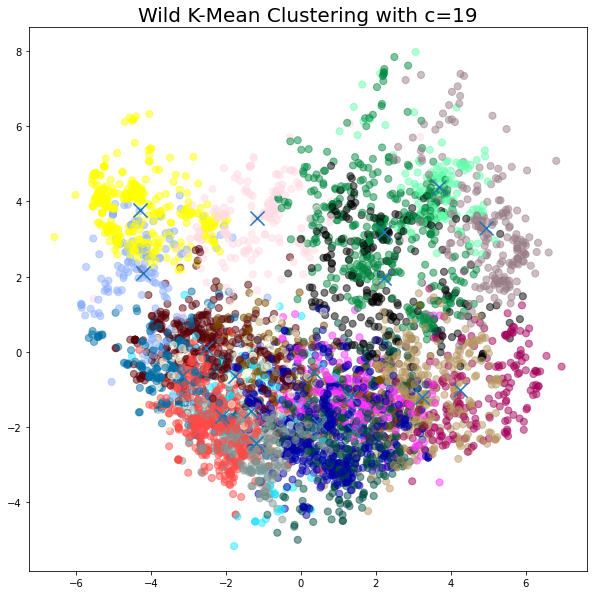


Cluster 1

Centroid: [1.75167401 3.51303965 3.27343612 3.00515419 2.49682819 2.36951542
 2.30488987 1.60013216 2.72885463 1.41577093 1.31048458 1.32687225
 1.39193833 1.60947137 2.67246696 1.09726872 0.910837   0.93629956
 2.56251101 3.86894273 0.93881057 1.85682819 1.37493392 1.40436123]

+-----------------------+--------------------+---------------------+
|                       |        mean        |      variance       |
+-----------------------+--------------------+---------------------+
|       churches        | 1.7516740088105731 | 1.2143653268878414  |
|        resorts        | 3.5130396475770906 | 1.4002115161202289  |
|        beaches        | 3.2734361233480165 | 1.2967173443530458  |
|         parks         | 3.0051541850220267 | 1.1078436708120531  |
|       theatres        | 2.4968281938326027 | 0.13779343495380303 |
|        museums        | 2.3695154185022047 | 0.11678162254882861 |
|         malls         | 2.3048898678414105 | 0.12997111613582327 |
|          zoo    

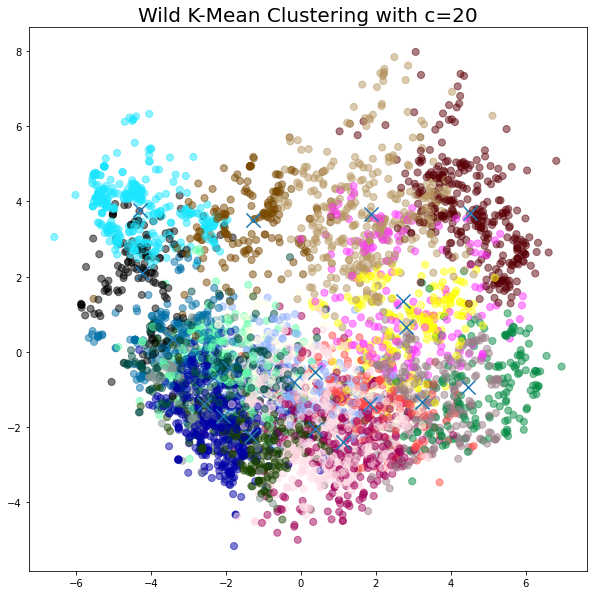


Cluster 1

Centroid: [0.35707483 0.90537415 1.46489796 1.48761905 1.57823129 1.60646259
 2.9914966  2.36863946 3.05557823 3.25360544 4.27319728 4.71142857
 4.87972789 4.28591837 0.86632653 0.92639456 1.2047619  1.37462585
 1.67333333 0.76176871 0.21632653 0.20993197 0.22768707 0.45809524]

+-----------------------+---------------------+----------------------+
|                       |        mean         |       variance       |
+-----------------------+---------------------+----------------------+
|       churches        | 0.3570748299319728  | 0.16121946696486802  |
|        resorts        | 0.9053741496598642  |  0.3008579069984156  |
|        beaches        |  1.464897959183673  | 0.04614433883142302  |
|         parks         |  1.487619047619047  | 0.10813881278538819  |
|       theatres        | 1.5782312925170057  |  0.2909639735346189  |
|        museums        | 1.6064625850340135  |  0.2983531544124499  |
|         malls         | 2.9914965986394546  |  2.127236101015748   

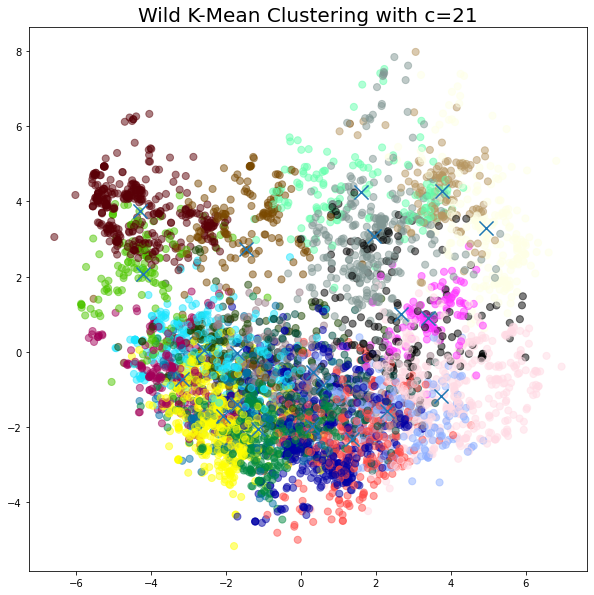


Cluster 1

Centroid: [1.47925   2.9765625 2.8891875 3.4985    2.8728125 2.490625  2.3985625
 1.691875  3.5066875 2.2685    1.187875  1.163625  1.198125  1.3731875
 1.93775   1.610625  0.7955    0.7999375 1.146625  4.969     1.41775
 2.98875   1.502375  1.31075  ]

+-----------------------+--------------------+----------------------+
|                       |        mean        |       variance       |
+-----------------------+--------------------+----------------------+
|       churches        |      1.47925       |  0.559156666666667   |
|        resorts        | 2.976562500000001  |  2.0040918828616348  |
|        beaches        | 2.8891874999999994 |  1.9423559394654113  |
|         parks         | 3.498500000000001  |  1.4932178616352207  |
|       theatres        | 2.8728125000000007 |  0.6810857507861636  |
|        museums        | 2.490625000000002  | 0.15553168238993698  |
|         malls         | 2.3985625000000015 | 0.25742119103773586  |
|          zoo          | 1.691875

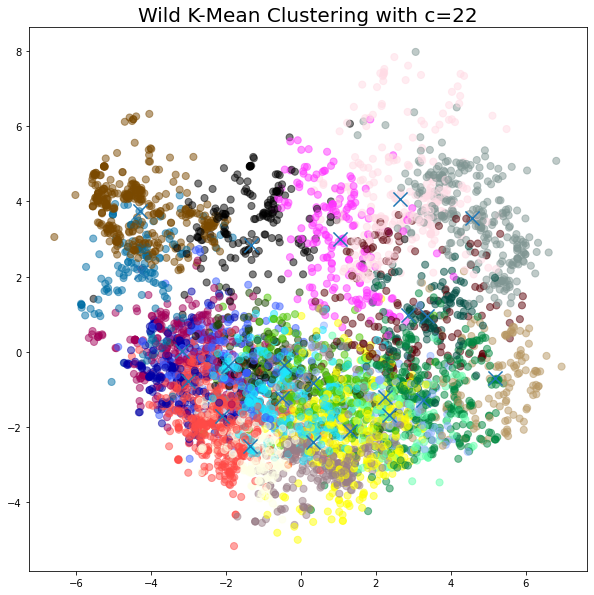


Cluster 1

Centroid: [1.45031088 1.67865285 1.96352332 2.11331606 2.08772021 2.03067358
 3.54963731 2.20108808 2.65559585 2.47673575 2.57321244 2.39046632
 2.44523316 3.38393782 4.16067358 4.89419689 3.09601036 1.81948187
 0.53699482 0.64777202 1.19544041 1.35740933 1.34170984 1.3815544 ]

+-----------------------+--------------------+---------------------+
|                       |        mean        |      variance       |
+-----------------------+--------------------+---------------------+
|       churches        | 1.4503108808290157 | 0.05699781951640758 |
|        resorts        | 1.6786528497409312 | 0.16700130073402433 |
|        beaches        | 1.9635233160621746 | 0.5164416882556128  |
|         parks         | 2.1133160621761657 | 0.40101498812607933 |
|       theatres        | 2.0877202072538865 | 0.3892791504749568  |
|        museums        | 2.0306735751295317 | 0.13479068976683925 |
|         malls         | 3.5496373056994774 | 2.3871316386010375  |
|          zoo    

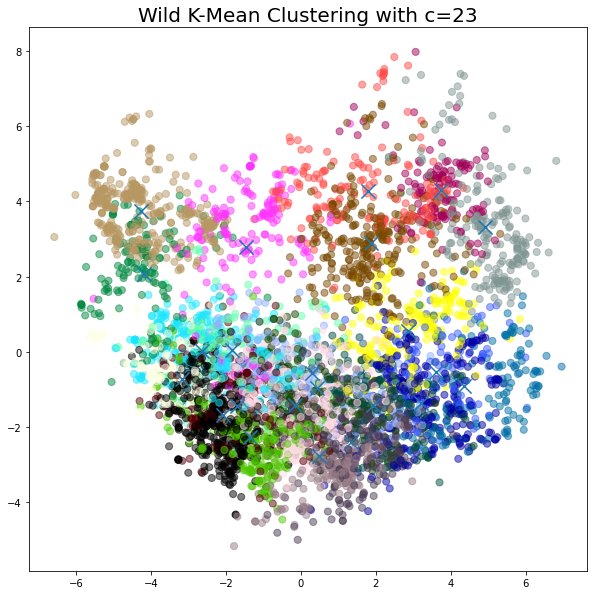


Cluster 1

Centroid: [1.27711027 1.42726236 1.62370722 2.16437262 2.26931559 2.40163498
 3.4        3.58477186 4.42927757 4.43245247 4.97328897 2.17431559
 1.73830798 1.32304183 1.25880228 1.13844106 0.72070342 0.34494297
 0.2821673  0.28661597 0.48562738 1.2578327  1.01444867 1.22342205]

+-----------------------+---------------------+---------------------+
|                       |        mean         |      variance       |
+-----------------------+---------------------+---------------------+
|       churches        | 1.2771102661596958  | 0.13511582400869096 |
|        resorts        | 1.4272623574144443  | 0.05387706246605106 |
|        beaches        | 1.6237072243346007  | 0.2570736588810422  |
|         parks         | 2.1643726235741436  |  1.312562177077672  |
|       theatres        |  2.269315589353616  | 1.0465183878326998  |
|        museums        |  2.401634980988594  | 0.7835801788882844  |
|         malls         | 3.4000000000000097  | 0.7516929523809486  |
|       

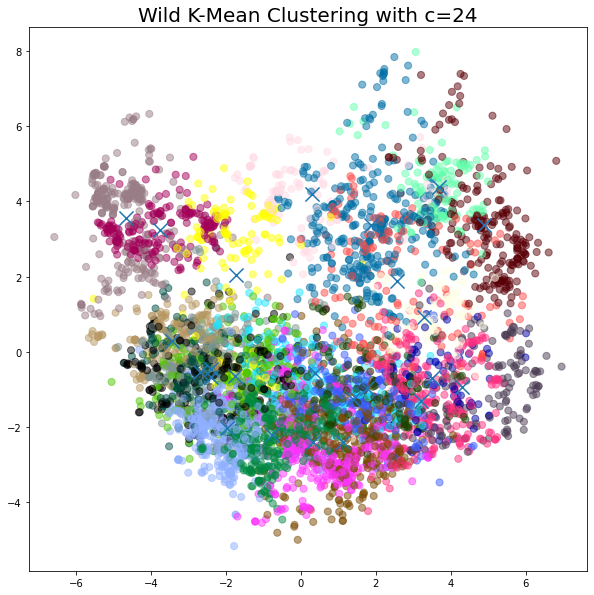


Cluster 1

Centroid: [1.10875536 1.32862661 1.96738197 2.14708155 2.41725322 3.29266094
 4.77253219 3.21815451 4.73622318 3.62716738 2.25506438 1.71
 1.53296137 1.42111588 4.87317597 0.75549356 0.6083691  0.60575107
 0.71480687 0.81184549 0.93553648 1.01227468 0.98240343 1.04060086]

+-----------------------+--------------------+----------------------+
|                       |        mean        |       variance       |
+-----------------------+--------------------+----------------------+
|       churches        | 1.1087553648068669 | 0.24565577179221562  |
|        resorts        | 1.3286266094420602 |  0.2441472435992305  |
|        beaches        | 1.9673819742489282 |  1.068029754328845   |
|         parks         | 2.1470815450643785 |  0.651084549356223   |
|       theatres        |  2.41725321888412  |  0.8178320778451973  |
|        museums        | 3.292660944206007  |  1.7574023716146179  |
|         malls         | 4.772532188841201  |  0.5149258879680353  |
|          zoo

In [29]:
multi_fs_kmean()